In [38]:
import lhapdf
#import ROOT
import math
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from iminuit import Minuit
import sys
sys.path.insert(1,'DSS')
import fDSS_

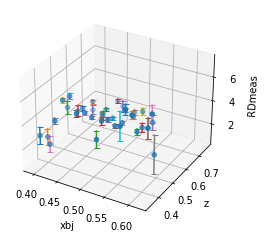

In [39]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#with open('yield_ratio_xz_combined_weighted.json') as j_RD:
#    RDxz = json.load(j_RD)
with open('yield_ratio_Q2xzRunG_combined_weighted.json') as j_RD:
    RDxz = json.load(j_RD)
zs = []
xs = []
RDs = []
RDs_error = []
for key_xbj,xbj_value in RDxz["5.500000"].items():
    xbj_center = float(key_xbj) 
    for key_z,z_value in xbj_value.items():
        xbj_corr = float(z_value["xbj_corr"])
        xbj = xbj_center*xbj_corr
        xs.append(xbj)
        z_center = float(key_z)
        z_corr = float(z_value["z_corr"])
        z_hadron = z_center*z_corr
        zs.append(z_hadron)
        RD=float(z_value["value_ratio"])
        RD_error = float(z_value["error_ratio"])
        RDs.append(float(z_value["value_ratio"]))
        RDs_error.append(float(z_value["error_ratio"]))
        ax.plot([xbj,xbj],[z_hadron,z_hadron],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")
plt.show()


4.0


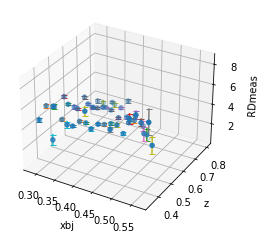

4.75


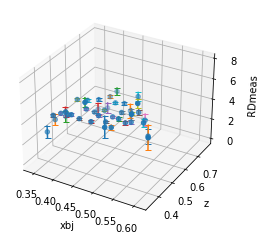

5.5


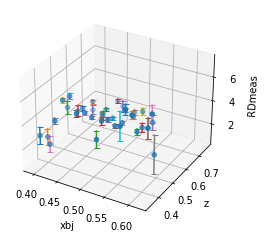

In [40]:
for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    print(Q2)
    for key_xbj,xbj_value in Q2_value.items():
        xbj_center = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
            xbj_corr = float(z_value["xbj_corr"])
            xbj = xbj_center*xbj_corr
            xs.append(xbj)
            z_center = float(key_z)
            z_corr = float(z_value["z_corr"])
            z_hadron = z_center*z_corr
            zs.append(z_hadron)
            #xs.append(xbj)
            #z_hadron = float(key_z)
            #zs.append(z_hadron)
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            RDs.append(float(z_value["value_ratio"]))
            RDs_error.append(float(z_value["error_ratio"]))
            ax.plot([xbj,xbj],[z_hadron,z_hadron],[RD+RD_error,RD-RD_error],marker="_")
    ax.scatter(xs,zs,RDs)
    ax.set_xlabel("xbj")
    ax.set_ylabel("z")
    ax.set_zlabel("RDmeas")
    plt.show()

In [41]:
#inits = [0.79468943,1.78784309]
inits = [-0.5,4]

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_17522/3766948282.py:100: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m_Q2.migrad()
No handles with labels found to put in legend.


7.519825173781336 35.532771528165085
['$\\chi^2$ / $n_\\mathrm{dof}$ = 2753.6 / 47']


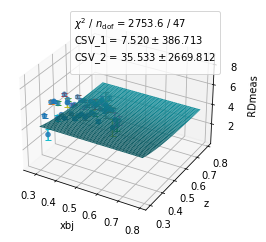

In [42]:
## Getting a PDF member object
import math
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq6 = lhapdf.mkPDF("cteq6l1/0")
from iminuit import Minuit
def Get_D_fav(z_had,Q):
    
    #Kretzer
    Dd_plus = 0.217*z_had**-1.805*(1-z_had)**2.037
    D_fav = Dd_plus;
    """
    #Binneweis
    Lambda = 0.227
    sv = math.log(math.log(Q*Q/(Lambda**2))/math.log(2/Lambda**2))
    N = 1.150-1.522*sv+1.378*sv**2-0.527*sv**3
    a1 = -0.740-1.680*sv+1.546*sv**2-0.596*sv**3
    a2 = 1.430+0.543*sv-0.023*sv**2
    D_sum = N*z_had**a1*(1.0-z_had)**a2
    #Ratio of D-/D+ from P.Geiger's thesis HERMES
    R_D = (1.0-z_had)**0.0083583/(1.0+z_had)**1.9838
    D_fav = D_sum/(1.0+R_D)
    """
    return D_fav
def Get_D_unfav(z_had,Q):
    
    #Kretzer
    Du_plus = 0.689*z_had**-1.039*(1-z_had)**1.241
    D_unfav = Du_plus;
    """
    #Binneweis
    Lambda = 0.227
    sv = math.log(math.log(Q*Q/(Lambda**2))/math.log(2/Lambda**2))
    N = 1.150-1.522*sv+1.378*sv**2-0.527*sv**3
    a1 = -0.740-1.680*sv+1.546*sv**2-0.596*sv**3
    a2 = 1.430+0.543*sv-0.023*sv**2
    D_sum = N*z_had**a1*(1.0-z_had)**a2
    #Ratio of D-/D+ from P.Geiger's thesis HERMES
    R_D = (1.0-z_had)**0.0083583/(1.0+z_had)**1.9838
    D_unfav = D_sum/(1.0+1.0/R_D)
    """
    return D_unfav
def Dz(Q,z_had):
    #fDSS
    duplus = fDSS_.fdss(1,1,0,z_hadron,Q*Q)[0]
    duminus = fDSS_.fdss(1,-1,0,z_hadron,Q*Q)[0]
    delta_z = duminus/duplus
    return (1-delta_z)/(1+delta_z)


def RDmeas_CSV(Q,z_had,xbj,CSV_1,CSV_2):
    #D_fav = Get_D_fav(z_had,Q)
    #D_unfav = Get_D_unfav(z_had,Q)
    #delta_z = D_fav/D_unfav
    #Dz = (1-delta_z)/(1+delta_z)
    Dzi = Dz(Q,z_had)
    CSVx = xbj**CSV_1*(1-xbj)**CSV_2 
    Bx = 2.5+5*(p_cteq6.xfxQ(-2,xbj,Q)+p_cteq6.xfxQ(-1,xbj,Q))/(p_cteq6.xfxQ(1,xbj,Q)+p_cteq6.xfxQ(2,xbj,Q))
    Ax = -4/(3*(p_cteq6.xfxQ(2,xbj,Q)+p_cteq6.xfxQ(1,xbj,Q)))
    return (Bx-Ax*CSVx)/Dzi-2.5
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
#with open('yield_ratio_xz_combined_weighted.json') as j_RD:
#    RDxz = json.load(j_RD)
zs = []
xs = []
RDs = []
RDs_error = []

for key_xbj,xbj_value in RDxz["4.000000"].items():
    xbj = float(key_xbj) 
    for key_z,z_value in xbj_value.items():
        xs.append(xbj)
        z_hadron = float(key_z)
        zs.append(z_hadron)
        RD=float(z_value["value_ratio"])
        RD_error = float(z_value["error_ratio"])
        RDs.append(float(z_value["value_ratio"]))
        RDs_error.append(float(z_value["error_ratio"]))
        ax.plot([xbj,xbj],[z_hadron,z_hadron],[RD+RD_error,RD-RD_error],marker="_")
        
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")
def least_squares_Q2(CSV_1,CSV_2):
    least_square = 0
    for key_xbj,xbj_value in RDxz["4.000000"].items():
        xbj = float(key_xbj) 
        Q = 2
        for key_z,z_value in xbj_value.items():
            
            z_hadron = float(key_z)
        
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            least_square += (RD-RDmeas_CSV(Q,z_hadron,xbj,CSV_1,CSV_2)) ** 2 / RD_error**2
    return least_square
m_Q2 = Minuit(least_squares_Q2,inits[0],inits[1])
#m_Q2 = Minuit(least_squares_Q2,0.73,-0.61,0.1,0.1,error_a = 0.05,error_b = 0.05,errordef=1)
m_Q2.migrad()
m_Q2.hesse()
print(*m_Q2.values)
#print(m_Q2.values["a"])
CSV_1s = m_Q2.values["CSV_1"]
CSV_2s = m_Q2.values["CSV_2"]


x = np.arange(0.3,0.8,0.01)
y = np.arange(0.3,0.8,0.01)
#x = np.array(xs)
#y = np.array(zs)
fit_RDmeas=[]
for xbj in x:
    fit_RDmeas_zi = []
    for zi in y:
        #fit_RDmeas_zi.append()
        fit_RDmeas.append(RDmeas_CSV(2,zi,xbj,m_Q2.values["CSV_1"],m_Q2.values["CSV_2"]))
X,Y = np.meshgrid(x,y)
Z = np.reshape(fit_RDmeas,X.shape)
ax.plot_surface(X,Y,Z)
#plt.plot(zs,fit_RDmeas,label = "fit")
#print(xs) 
#print(zs)
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_Q2.fval:.1f} / {len(zs) - m_Q2.nfit}",
]
print(fit_info)
for p, v, e in zip(m_Q2.parameters, m_Q2.values, m_Q2.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))

     
plt.show()

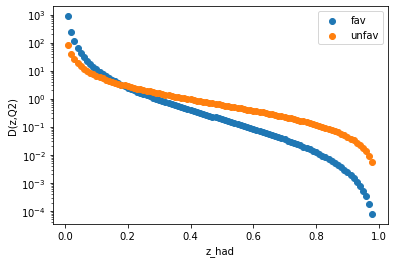

In [43]:
Q = 2
z_hadron = np.arange(0.01,0.99,0.01)
D_favs=[]
D_unfavs=[]
for z_had in z_hadron:
    D_fav = Get_D_fav(z_had,Q)
    D_unfav = Get_D_unfav(z_had,Q)
    D_favs.append(D_fav)
    D_unfavs.append(D_unfav)

plt.yscale('log')
plt.scatter(z_hadron,D_favs,label = "fav")
plt.scatter(z_hadron,D_unfavs,label = "unfav")
plt.xlabel("z_had")
plt.ylabel("D(z,Q2)")
plt.legend()

4.0


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_17522/1417112050.py:49: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m_Q2.migrad()
No handles with labels found to put in legend.


8.684220374514952 10.706027664865298
['$\\chi^2$ / $n_\\mathrm{dof}$ = 2753.6 / 47']


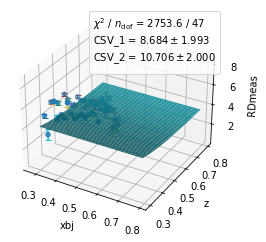

4.75
11.093739479964363 16.264152498832956


No handles with labels found to put in legend.


['$\\chi^2$ / $n_\\mathrm{dof}$ = 1455.1 / 40']


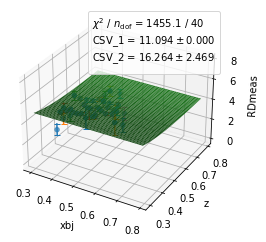

5.5
4.4080464618803035 -0.3842911807372341


No handles with labels found to put in legend.


['$\\chi^2$ / $n_\\mathrm{dof}$ = 605.1 / 36']


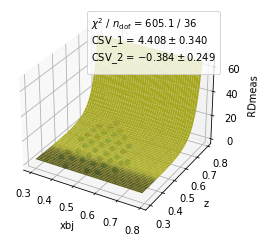

In [44]:
import math
CSV_1s = []
CSV_2s = []
CSV_1_err = []
CSV_2_err = []
kaisquare = []
Qs = []
for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    Qs.append(Q2)
    print(Q2)
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
            xs.append(xbj)
            z_hadron = float(key_z)
            zs.append(z_hadron)
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            RDs.append(float(z_value["value_ratio"]))
            RDs_error.append(float(z_value["error_ratio"]))
            ax.plot([xbj,xbj],[z_hadron,z_hadron],[RD+RD_error,RD-RD_error],marker="_")
    ax.scatter(xs,zs,RDs)
    ax.set_xlabel("xbj")
    ax.set_ylabel("z")
    ax.set_zlabel("RDmeas")
    
    def least_squares_Q2(CSV_1,CSV_2):
        least_square = 0
        for key_xbj,xbj_value in Q2_value.items():
            xbj = float(key_xbj) 
            Q = math.sqrt(Q2)
            for key_z,z_value in xbj_value.items():
            
                z_hadron = float(key_z)
        
                RD=float(z_value["value_ratio"])
                RD_error = float(z_value["error_ratio"])
                least_square += (RD-RDmeas_CSV(Q,z_hadron,xbj,CSV_1,CSV_2)) ** 2 / RD_error**2
        return least_square
    m_Q2 = Minuit(least_squares_Q2,0,0)
    #m_Q2 = Minuit(least_squares_Q2,0.73,-0.61,0.1,0.1,error_a = 0.05,error_b = 0.05,errordef=1)
    m_Q2.migrad()
    m_Q2.hesse()
    print(*m_Q2.values)
    #print(m_Q2.values["a"])
    CSV_1s.append(m_Q2.values["CSV_1"])
    CSV_2s.append(m_Q2.values["CSV_2"])
    CSV_1_err.append(m_Q2.errors["CSV_1"])
    CSV_2_err.append(m_Q2.errors["CSV_2"])
    
    x = np.arange(0.3,0.8,0.01)
    y = np.arange(0.3,0.8,0.01)
    
    
    #x = np.array(xs)
    #y = np.array(zs)
    fit_RDmeas=[]
    for xbj in x:
        fit_RDmeas_zi = []
        for zi in y:
            #fit_RDmeas_zi.append()
            fit_RDmeas.append(RDmeas_CSV(2,zi,xbj,m_Q2.values["CSV_1"],m_Q2.values["CSV_2"]))
    X,Y = np.meshgrid(x,y)
    Z = np.reshape(fit_RDmeas,X.shape)
    ax.plot_surface(X,Y,Z)
    #plt.plot(zs,fit_RDmeas,label = "fit")
    #print(xs) 
    #print(zs)
    fit_info = [
        f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_Q2.fval:.1f} / {len(zs) - m_Q2.nfit}",
    ]
    print(fit_info)
    for p, v, e in zip(m_Q2.parameters, m_Q2.values, m_Q2.errors):
        fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
    plt.legend(title="\n".join(fit_info))

     
    plt.show()
    

4.0
4.75
5.5


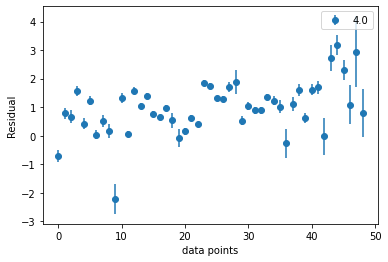

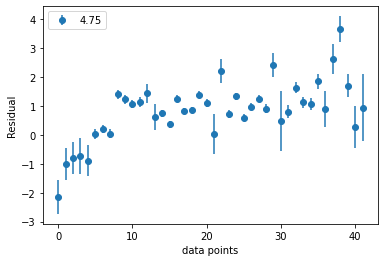

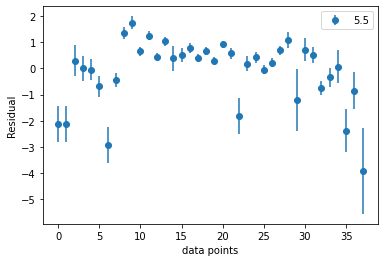

In [45]:
i_Q2 = 0

for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    #Qs.append(Q2)
    print(Q2)
    i_count = 0
    Residual = []
    Residual_count = []
    Residual_error = []
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
            xs.append(xbj)
            z_hadron = float(key_z)
            zs.append(z_hadron)
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            Residual_error.append(RD_error)
        
            RDmeas_CSV_fit = RDmeas_CSV(math.sqrt(Q2),z_hadron,xbj,CSV_1s[i_Q2],CSV_2s[i_Q2])
            Residual.append(RD-RDmeas_CSV_fit)
            Residual_count.append(i_count)
            i_count+=1
  
    #plt.plot(Residual_count,Residual,"P",label=Qs[i_Q2])
    plt.errorbar(Residual_count,Residual,Residual_error,fmt='o',label = Qs[i_Q2])
    plt.xlabel("data points")
    plt.ylabel("Residual")
    plt.legend()
    i_Q2+=1

4.0
4.75
5.5


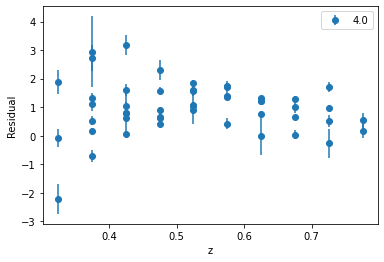

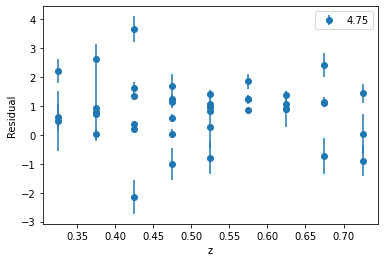

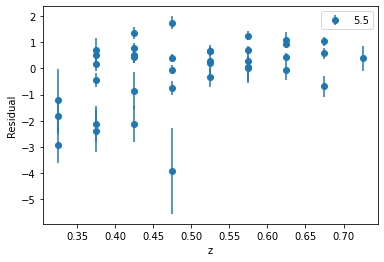

In [46]:
i_Q2 = 0

for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
   
    print(Q2)
    i_count = 0
    Residual = []
    Residual_count = []
    Residual_error = []
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
            xs.append(xbj)
            z_hadron = float(key_z)
            zs.append(z_hadron)
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            Residual_error.append(RD_error)
           
            RDmeas_CSV_fit = RDmeas_CSV(math.sqrt(Q2),z_hadron,xbj,CSV_1s[i_Q2],CSV_2s[i_Q2])
            Residual.append(RD-RDmeas_CSV_fit)
            Residual_count.append(i_count)
            i_count+=1
    #plt.plot(Residual_count,Residual,"P",label=Qs[i_Q2])
    plt.errorbar(zs,Residual,Residual_error,fmt='o',label = Qs[i_Q2])
    plt.xlabel("z")
    plt.ylabel("Residual")
    plt.legend()
    i_Q2+=1

4.0
4.75
5.5


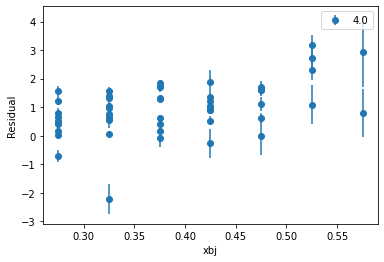

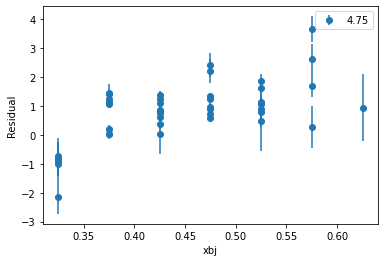

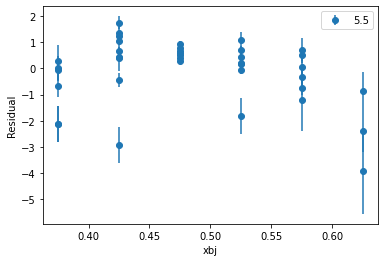

In [47]:
i_Q2 = 0

for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    
    print(Q2)
    i_count = 0
    Residual = []
    Residual_count = []
    Residual_error = []
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
            xs.append(xbj)
            z_hadron = float(key_z)
            zs.append(z_hadron)
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            Residual_error.append(RD_error)
            
            RDmeas_CSV_fit = RDmeas_CSV(math.sqrt(Q2),z_hadron,xbj,CSV_1s[i_Q2],CSV_2s[i_Q2])
            Residual.append(RD-RDmeas_CSV_fit)
            Residual_count.append(i_count)
            i_count+=1
  
    #plt.plot(Residual_count,Residual,"P",label=Qs[i_Q2])
    plt.errorbar(xs,Residual,Residual_error,fmt='o',label = Qs[i_Q2])
    plt.xlabel("xbj")
    plt.ylabel("Residual")
    plt.legend()
    i_Q2+=1

In [48]:
print(len(Qs))
print("CSV parameters 1,2")
for i in range(len(Qs)):
    
    print(Qs[i]," ",f"{CSV_1s[i]:.5f}",f"{CSV_2s[i]:.5f}")
    print(" err "," ",f"{CSV_1_err[i]:.5f}",f"{CSV_2_err[i]:.5f}")



3
CSV parameters 1,2
4.0   8.68422 10.70603
 err    1.99302 2.00000
4.75   11.09374 16.26415
 err    0.00000 2.46943
5.5   4.40805 -0.38429
 err    0.33952 0.24909


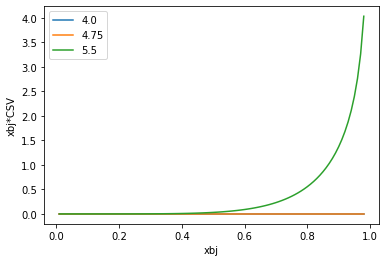

In [49]:
def CSVx(xbj,CSV_1,CSV_2):
    return xbj**CSV_1*(1-xbj)**CSV_2
for i in range(len(Qs)):
#for i in range(2):
    x = np.arange(0.01,0.99,0.01)
    fit_CSV=[]
    for xbj in x:
        fit_CSV.append(xbj*CSVx(xbj,CSV_1s[i],CSV_2s[i]))
    plt.plot(x,fit_CSV,label = Qs[i]);  
    
#plt.plot([0.75,0.75],[0,0.2],'k-')
#plt.plot([0.35,0.35],[0,0.2],'k-')
plt.xlabel("xbj")
plt.ylabel("xbj*CSV")
#plt.ylim(0,0.02)
plt.legend()

Text(0, 0.5, 'xbj*CSV')

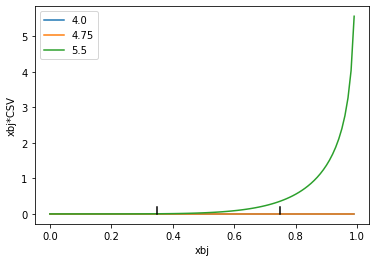

In [50]:
xbj = np.arange(0.0,1,0.01)
def CSVx(xbj,c,d):
    return xbj**c*(1-xbj)**d


plt.plot(xbj,xbj*CSVx(xbj,CSV_1s[0],CSV_2s[0]),label=Qs[0])

plt.plot(xbj,xbj*CSVx(xbj,CSV_1s[1],CSV_2s[1]),label=Qs[1])
plt.plot(xbj,xbj*CSVx(xbj,CSV_1s[2],CSV_2s[2]),label=Qs[2])
#plt.plot(xbj,xbj*CSVx(xbj,parameter_c[3],parameter_d[3]),label=Qs[3])
plt.legend()
#plt.ylim(0,0.2)
plt.plot([0.75,0.75],[0,0.2],'k-')
plt.plot([0.35,0.35],[0,0.2],'k-')


plt.xlabel("xbj")
plt.ylabel("xbj*CSV")

Text(0, 0.5, 'xbj*CSV')

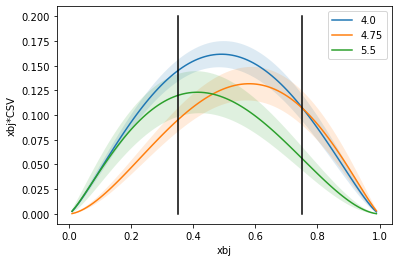

In [64]:
from iminuit.util import propagate
xbj = np.linspace(0.01,0.99,100)
#xbj = np.linspace(0.1,0.8,100)
def CSVx(xbj,c,d):
    return xbj**c*(1-xbj)**d

upper0=np.linspace(0,0,100)
xbjCSVx0=np.linspace(0,0,100)
for i_c in np.arange(-CSV_1_err[0],CSV_1_err[0],0.001):
    for i_d in np.arange(-CSV_2_err[0],CSV_2_err[0],0.001):
        for i in range(len(xbj)):
            xbjCSVx0[i]=xbj[i]*CSVx(xbj[i],CSV_1s[0],CSV_2s[0])   
            diff0 = xbj[i]*CSVx(xbj[i],CSV_1s[0]+i_c,CSV_2s[0]+i_d)-xbjCSVx0[i]  
            upper0[i]=max(upper0[i],abs(diff0))
plt.plot(xbj,xbjCSVx0,label=Qs[0])
plt.fill_between(xbj,xbjCSVx0+upper0,xbjCSVx0-upper0,alpha = 0.15)

upper1=np.linspace(0,0,100)
xbjCSVx1=np.linspace(0,0,100)
for i_c in np.arange(-CSV_1_err[1],CSV_1_err[1],0.001):
    for i_d in np.arange(-CSV_2_err[1],CSV_2_err[1],0.001):
        for i in range(len(xbj)):          
            xbjCSVx1[i]=xbj[i]*CSVx(xbj[i],CSV_1s[1],CSV_2s[1])   
            diff1 = xbj[i]*CSVx(xbj[i],CSV_1s[1]+i_c,CSV_2s[1]+i_d)-xbjCSVx1[i]  
            upper1[i]=max(upper1[i],abs(diff1))
plt.plot(xbj,xbjCSVx1,label=Qs[1])
plt.fill_between(xbj,xbjCSVx1+upper1,xbjCSVx1-upper1,alpha = 0.15)

upper2=np.linspace(0,0,100)
xbjCSVx2=np.linspace(0,0,100)
for i_c in np.arange(-CSV_1_err[2],CSV_1_err[2],0.001):
    for i_d in np.arange(-CSV_2_err[2],CSV_2_err[2],0.001):
        for i in range(len(xbj)):              
            xbjCSVx2[i]=xbj[i]*CSVx(xbj[i],CSV_1s[2],CSV_2s[2])   
            diff2 = xbj[i]*CSVx(xbj[i],CSV_1s[2]+i_c,CSV_2s[2]+i_d)-xbjCSVx2[i]  
            upper2[i]=max(upper2[i],abs(diff2))
plt.plot(xbj,xbjCSVx2,label=Qs[2])
plt.fill_between(xbj,xbjCSVx2+upper2,xbjCSVx2-upper2,alpha = 0.15)
plt.plot([0.75,0.75],[0,0.2],'k-')
plt.plot([0.35,0.35],[0,0.2],'k-')


plt.legend()
plt.xlabel("xbj")
plt.ylabel("xbj*CSV")